In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.io import wavfile
import os
# from pydub import AudioSegment
from matplotlib.pyplot import *

%matplotlib inline

In [2]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

In [5]:
fname = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/mixed_membership_assignments_df.feather'

df = pd.read_feather(fname)

df_c2 = df[df.cohort=='c2']
df_c4 = df[df.cohort=='c4']
df_c5 = df[df.cohort=='c5']

In [6]:
z = df.groupby('z_70')['index'].count().values
reorder = np.argsort(z)[::-1]


z_c2 = df_c2.groupby('z_70')['index'].count().values[reorder]
z_c4 = df_c4.groupby('z_70')['index'].count().values[reorder]
z_c5 = df_c5.groupby('z_70')['index'].count().values[reorder]

z_c2_prop = z_c2/sum(z_c2)
z_c4_prop = z_c4/sum(z_c4)
z_c5_prop = z_c5/sum(z_c5)

z_all_prop = np.array([z_c2_prop, z_c4_prop, z_c5_prop])

In [7]:
len(df)

583237

In [8]:
sns.set_context('talk')

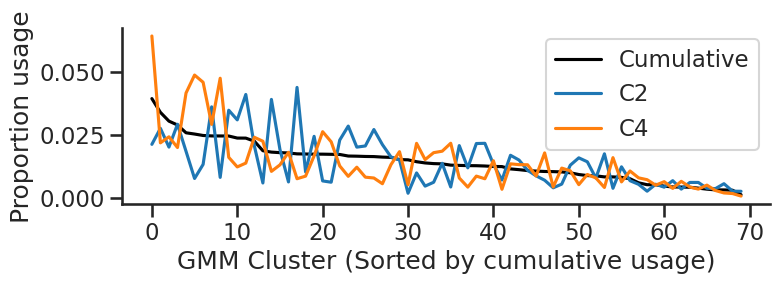

In [9]:
figure(figsize=(8,3))
# figure(figsize=(16,2))

plot(z[reorder]/sum(z[reorder]), 'k', label='Cumulative')
plot(z_c2_prop, label='C2')
plot(z_c4_prop, label='C4')
# plot(z_c5_prop, label='C5')

ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by cumulative usage)')

legend(bbox_to_anchor=(1,1))
sns.despine()
tight_layout()
# xlim(,)
# savefig('/Users/ralph/Downloads/gmm_usage.svg')

In [12]:
z_c2_prop[-1]/z_c4_prop[-1]

3.7134300111529446

# difference plots 

In [13]:
z2z4_diff = np.argsort(z_c2_prop-z_c4_prop)
z2z5_diff = np.argsort(z_c2_prop-z_c5_prop)
z4z5_diff = np.argsort(z_c4_prop-z_c5_prop)

z2z4_fold = np.argsort(np.log2((z_c2_prop/z_c4_prop)))
z2z5_fold = np.argsort(np.log2(z_c2_prop/z_c5_prop))
z4z5_fold = np.argsort(np.log2(z_c4_prop/z_c5_prop))

NameError: name 'c2_usages_perm' is not defined

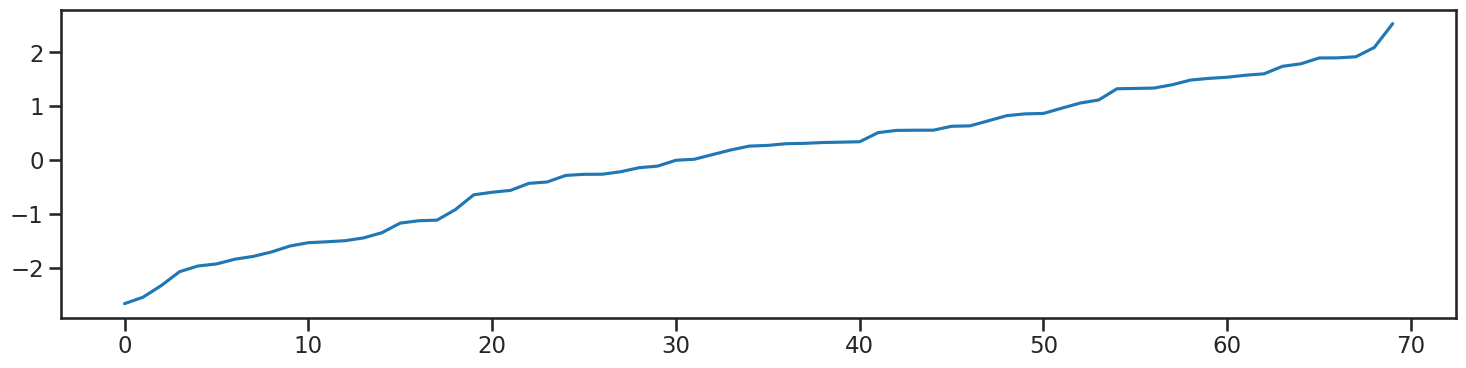

In [14]:
figure(figsize=(18,4))
plot(np.log2(z_c2_prop[z2z4_fold]/z_c4_prop[z2z4_fold]))

plot(np.log2(c2_usages_perm[0][z2z4_fold]/c4_usages_perm[0][z2z4_fold]), 'k', label='Shuffle')
[plot(np.log2(c2_usages_perm[i][z2z4_fold]/c4_usages_perm[i][z2z4_fold]), 'k') for i in range(1000)]

xticks(np.arange(70), z2z4_fold, rotation=45, fontsize=_fontsize)
# hlines(1, 0, 70, color='r')

ylabel(' Log2 Fold Change')
xlabel('State')
sns.despine()

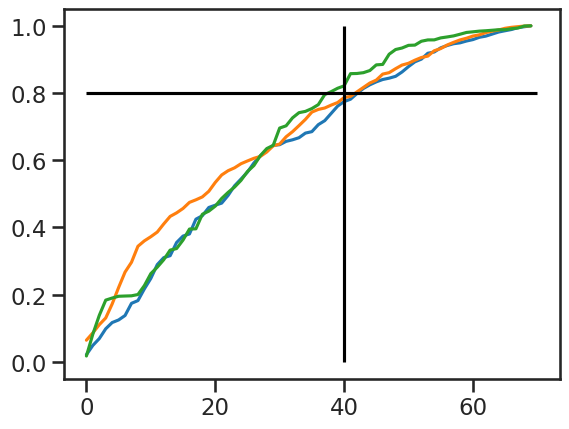

In [15]:
plot(np.cumsum(z_c2_prop))
plot(np.cumsum(z_c4_prop))
plot(np.cumsum(z_c5_prop))

hlines(.8, 0, 70, color='k')
vlines(40, 0, 1, color='k')

In [16]:
sns.set_context('talk')

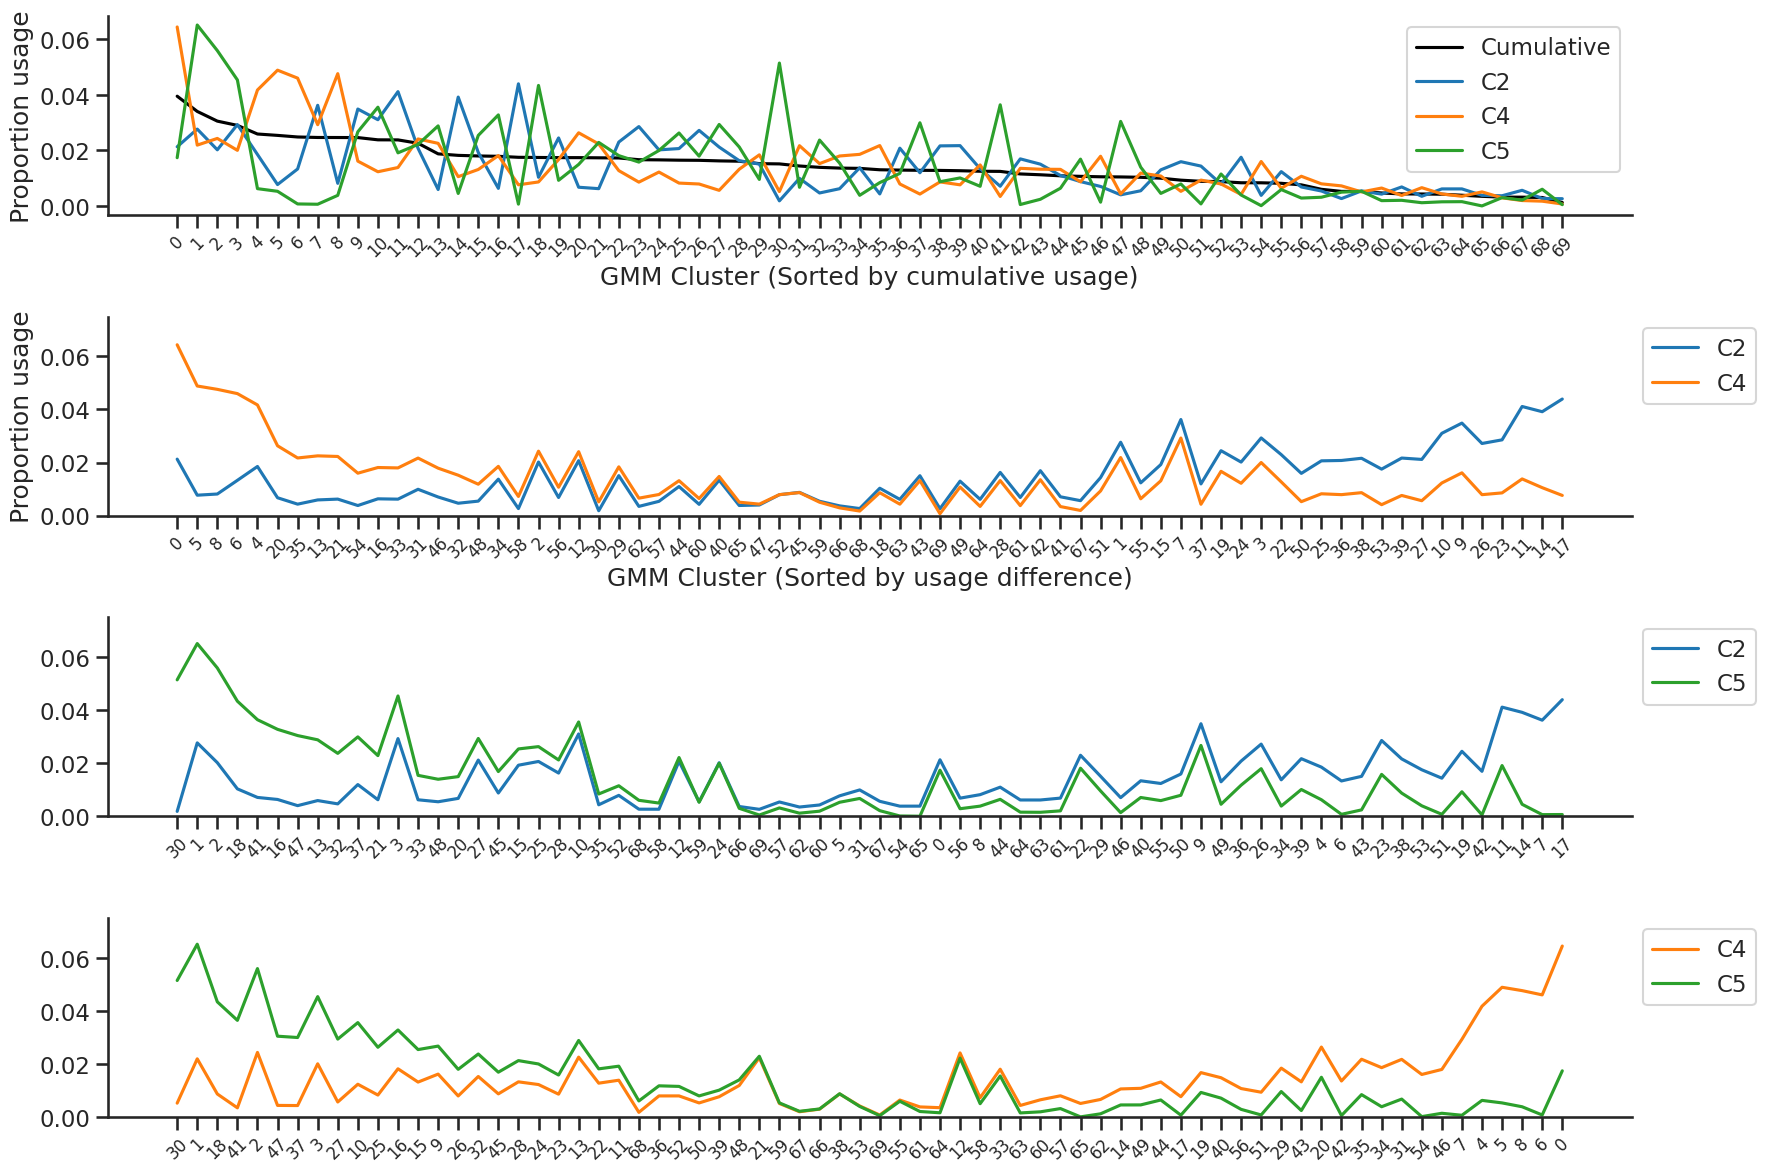

In [17]:
figure(figsize=(18,12))

_fontsize=12

subplot(4,1,1)
plot(z[reorder]/sum(z[reorder]), 'k', label='Cumulative')
plot(z_c2_prop, label='C2')
plot(z_c4_prop, label='C4')
plot(z_c5_prop, label='C5')

ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by cumulative usage)')
xticks(np.arange(70), fontsize=_fontsize, rotation=45)
legend(bbox_to_anchor=(1,1))
sns.despine()

subplot(4,1,2)
plot(z_c2_prop[z2z4_diff], label='C2', c='C0')
plot(z_c4_prop[z2z4_diff], label='C4', c='C1')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z4_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)
ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by usage difference)')

subplot(4,1,3)
plot(z_c2_prop[z2z5_diff], label='C2', c='C0')
plot(z_c5_prop[z2z5_diff], label='C5', c='C2')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z5_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)

subplot(4,1,4)
plot(z_c4_prop[z4z5_diff], label='C4', c='C1')
plot(z_c5_prop[z4z5_diff], label='C5', c='C2')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z4z5_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)

# ylabel('Proportion usage')
# xlabel('GMM Cluster (Sorted by usage difference)')

sns.despine()
tight_layout()
# savefig('/Users/ralph/Downloads/usages.svg')

In [18]:
sns.set_context('talk')

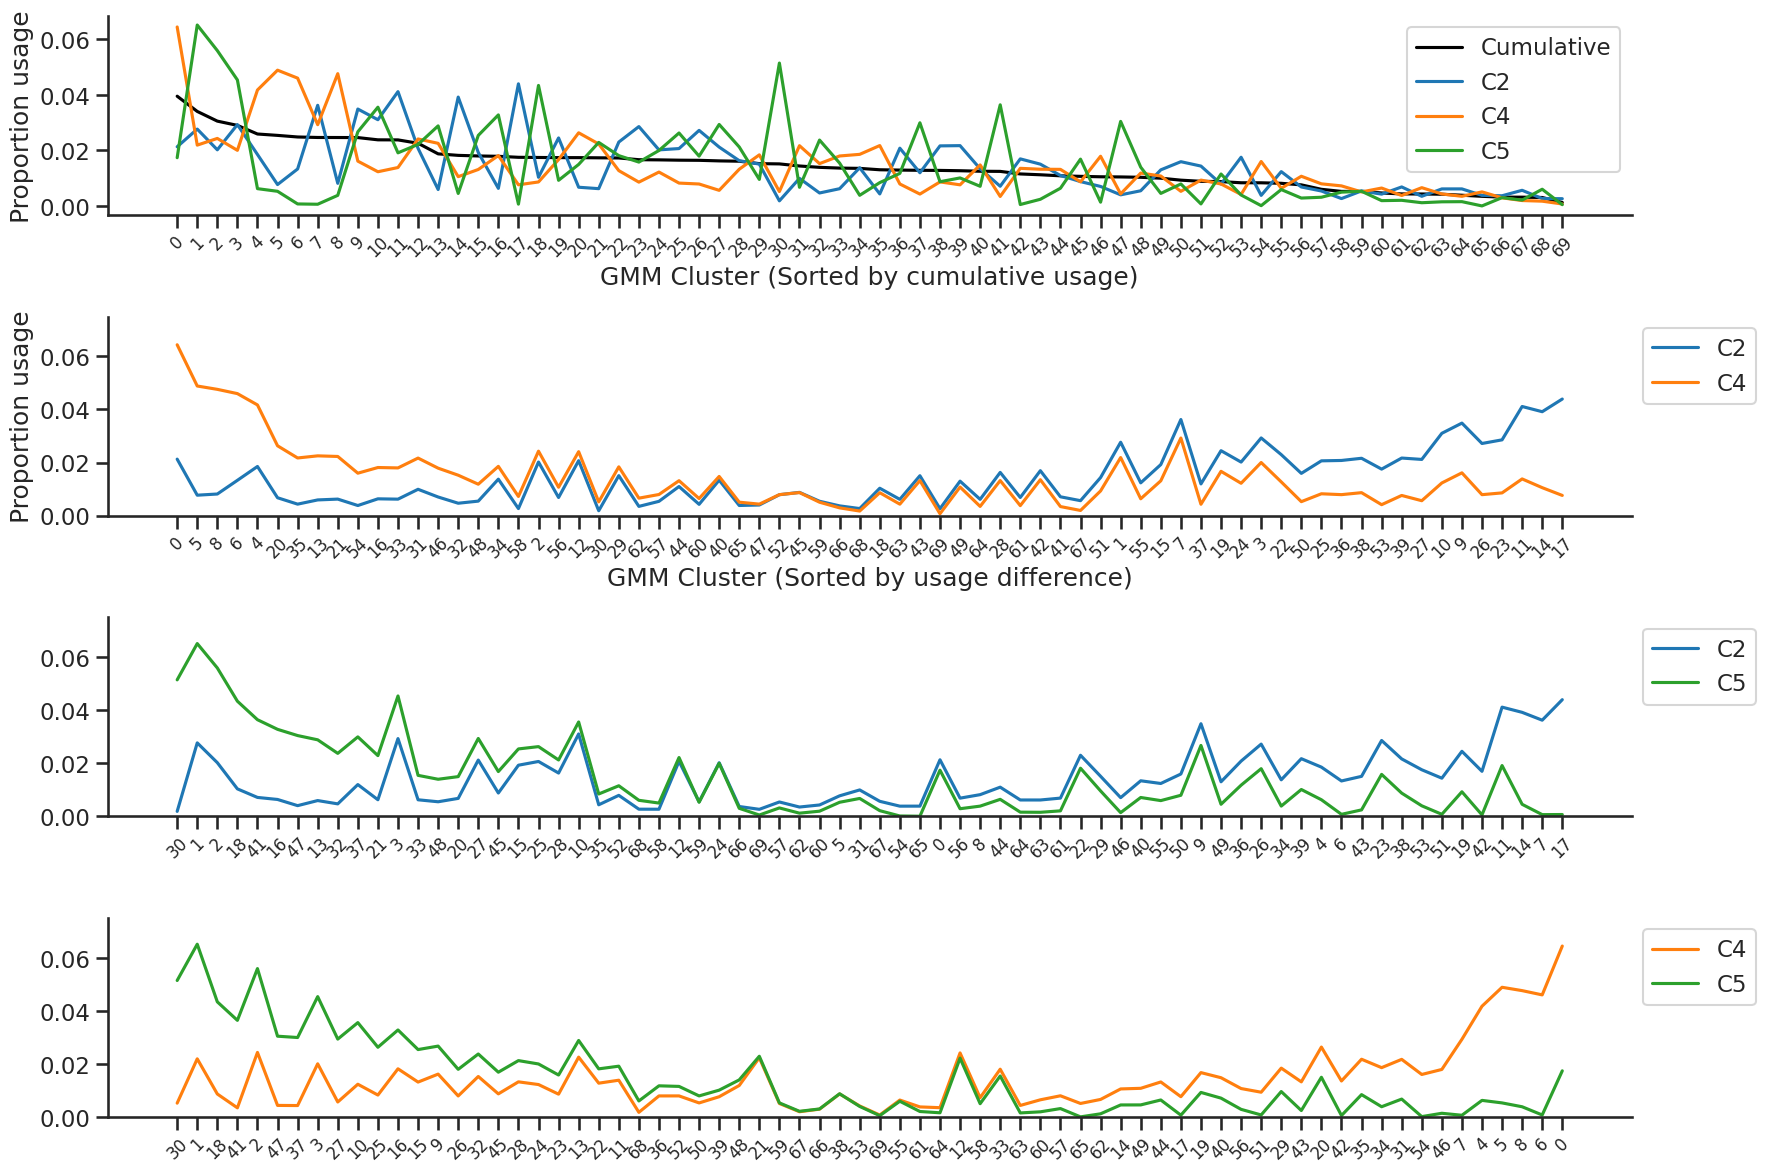

In [19]:
figure(figsize=(18,12))

_fontsize=12

subplot(4,1,1)
plot(z[reorder]/sum(z[reorder]), 'k', label='Cumulative')
plot(z_c2_prop, label='C2')
plot(z_c4_prop, label='C4')
plot(z_c5_prop, label='C5')

ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by cumulative usage)')
xticks(np.arange(70), fontsize=_fontsize, rotation=45)
legend(bbox_to_anchor=(1,1))
sns.despine()

subplot(4,1,2)
plot(z_c2_prop[z2z4_diff], label='C2', c='C0')
plot(z_c4_prop[z2z4_diff], label='C4', c='C1')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z4_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)
ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by usage difference)')

subplot(4,1,3)
plot(z_c2_prop[z2z5_diff], label='C2', c='C0')
plot(z_c5_prop[z2z5_diff], label='C5', c='C2')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z5_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)

subplot(4,1,4)
plot(z_c4_prop[z4z5_diff], label='C4', c='C1')
plot(z_c5_prop[z4z5_diff], label='C5', c='C2')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z4z5_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)

# ylabel('Proportion usage')
# xlabel('GMM Cluster (Sorted by usage difference)')

sns.despine()
tight_layout()
# savefig('/Users/ralph/Downloads/usages.svg')

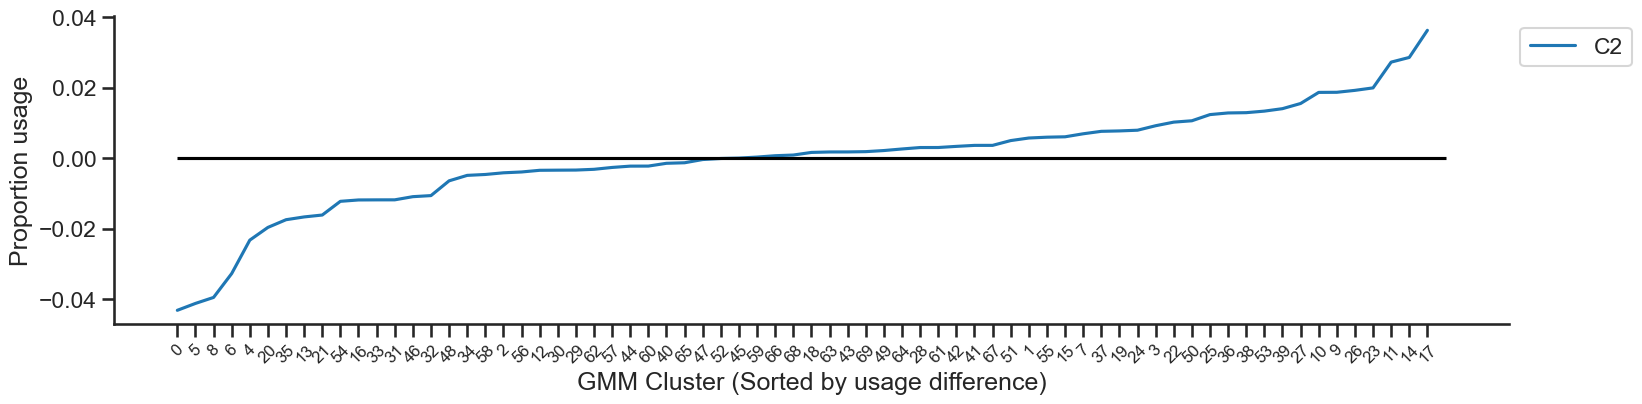

In [15]:
figure(figsize=(18,4))

plot(z_c2_prop[z2z4_diff]-z_c4_prop[z2z4_diff], label='C2', c='C0')

# plot(z_c2_prop[z2z4_diff], label='C2', c='C0')
# plot(z_c4_prop[z2z4_diff], label='C4', c='C1')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z4_diff, rotation=45, fontsize=_fontsize)
# ylim(0,.075)
hlines(0,0,70, color='k')
ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by usage difference)')
sns.despine()

In [80]:
cohort_id = df.cohort.values

In [84]:
cohort_id.shape

(583237,)

In [83]:
labels.shape

(583237,)

In [85]:
c2_usages_perm = []
c4_usages_perm = []
c5_usages_perm = []

cohort_id = df.cohort.values
labels = df.z_70.values

all_labels_perm = []
for i in range(1000):
    labels_perm = np.random.permutation(labels)
    all_labels_perm.append(labels_perm)
    
    c2_labels_perm = labels_perm[cohort_id == 'c2']
    c4_labels_perm = labels_perm[cohort_id == 'c4']
    c5_labels_perm = labels_perm[cohort_id == 'c5']
    
    c2_usages = np.unique(c2_labels_perm, return_counts=True)[1]/len(c2_labels_perm)
    c4_usages = np.unique(c4_labels_perm, return_counts=True)[1]/len(c4_labels_perm)
    c5_usages = np.unique(c5_labels_perm, return_counts=True)[1]/len(c5_labels_perm)

    c2_usages_reorder = c2_usages[reorder]
    c4_usages_reorder = c4_usages[reorder]
    c5_usages_reorder = c5_usages[reorder]

    c2_usages_perm.append(c2_usages_reorder)
    c4_usages_perm.append(c4_usages_reorder)
    c5_usages_perm.append(c5_usages_reorder)

c2_usages_perm = np.array(c2_usages_perm)
c4_usages_perm = np.array(c4_usages_perm)
c5_usages_perm = np.array(c5_usages_perm)

In [93]:
a = np.unique(c2_labels_perm, return_counts=True)[1]/len(c2_labels_perm)

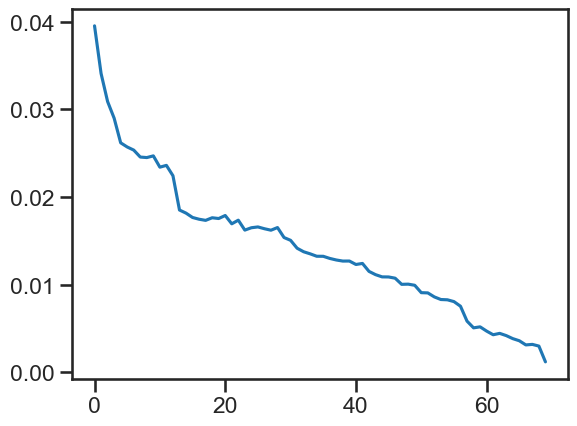

In [95]:
plot(a[reorder])

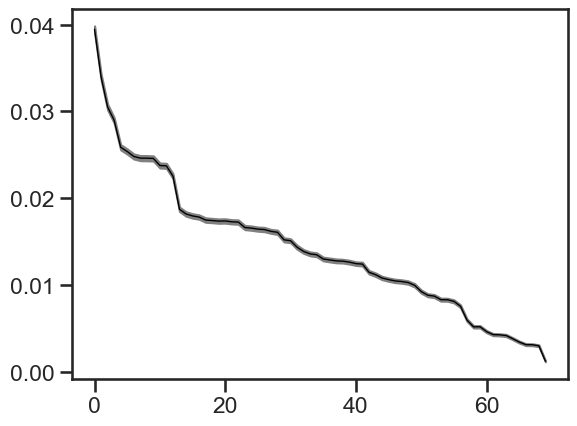

In [68]:
fill_between(np.arange(70), 
             np.mean(c2_usages_perm, axis=0)-np.std(c2_usages_perm, axis=0),
             np.mean(c2_usages_perm, axis=0)+np.std(c2_usages_perm, axis=0), color='gray')

plot(np.mean(c2_usages_perm, axis=0), 'k', linewidth=1)

In [ ]:
fill_between()


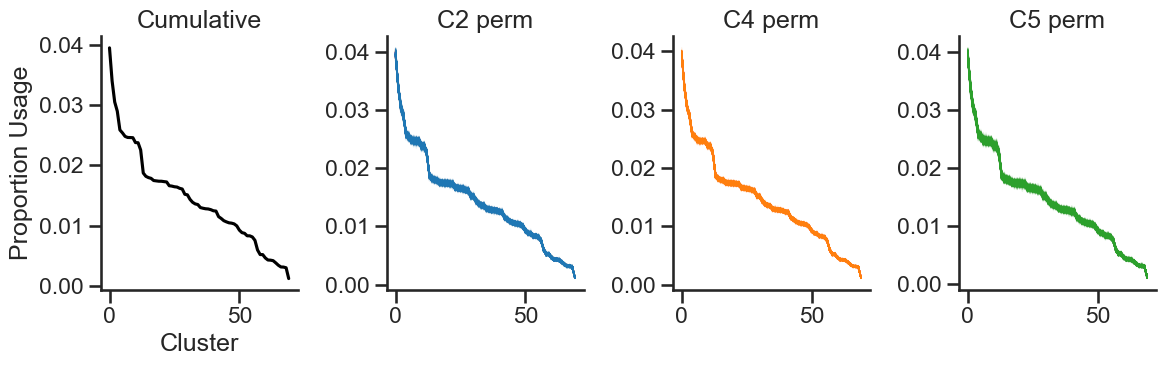

In [60]:
figure(figsize=(12,4))

subplot(141)
plot(z[reorder]/sum(z[reorder]), 'k')
title('Cumulative')
ylabel('Proportion Usage')
xlabel('Cluster')

subplot(142)
[plot(c2_usages_perm[i], 'C0', linewidth=1, alpha=0.1) for i in range(1000)];
title('C2 perm')

subplot(143)
[plot(c4_usages_perm[i], 'C1', linewidth=1, alpha=0.1) for i in range(1000)];
title('C4 perm')

subplot(144)
[plot(c5_usages_perm[i], 'C2', linewidth=1, alpha=0.1) for i in range(1000)];
title('C5 perm')

sns.despine()
tight_layout()

In [34]:
sns.set_context('talk')

In [36]:
diff = z_c2_prop[z2z4_diff]-z_c4_prop[z2z4_diff]

In [40]:
diff < 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [44]:
np.where(diff > 0)[0][0]

31

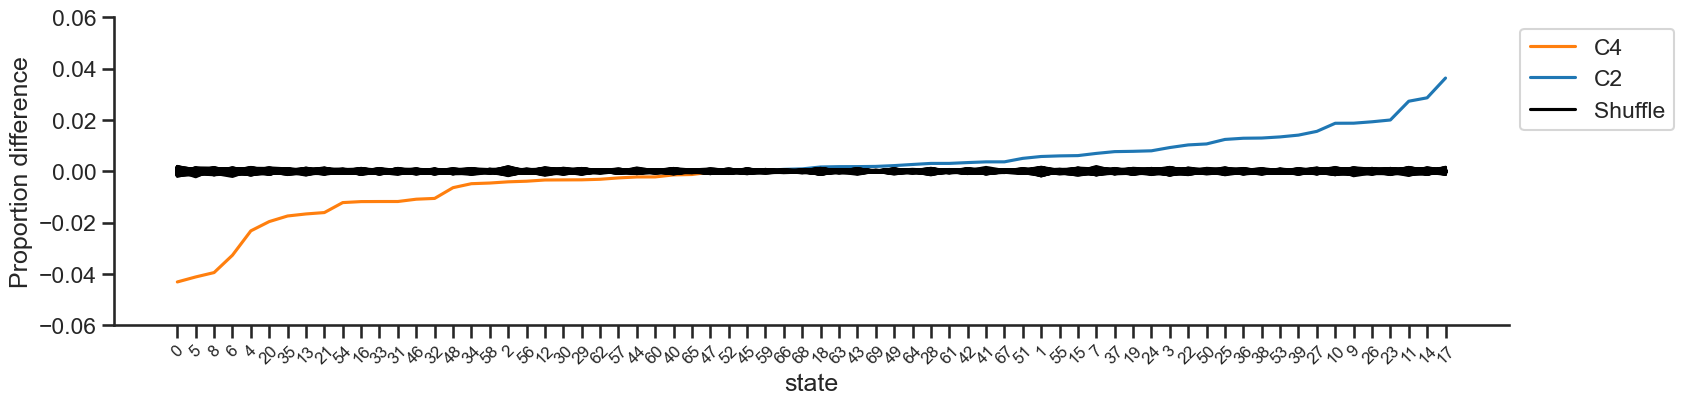

In [102]:
figure(figsize=(18,4))

plot(z_c2_prop[z2z4_diff][diff < 0]-z_c4_prop[z2z4_diff][diff < 0], label='C4', c='C1')
plot(np.arange(np.where(diff > 0)[0][0], len(z_c2_prop)),
     z_c2_prop[z2z4_diff][diff > 0]-z_c4_prop[z2z4_diff][diff > 0], label='C2', c='C0')

plot(c2_usages_perm[0][z2z4_diff]-c4_usages_perm[0][z2z4_diff], 'k', label='Shuffle')
[plot(c2_usages_perm[i][z2z4_diff]-c4_usages_perm[i][z2z4_diff], 'k') for i in range(1000)]
# fill_between(z2z4_diff, 
#              np.mean(c2_usages_perm[z2z4_diff], axis=0)-np.std(c2_usages_perm[z2z4_diff], axis=0),
#              np.mean(c2_usages_perm[z2z4_diff], axis=0)+np.std(c2_usages_perm[z2z4_diff], axis=0),
#              color='gray')

ylim(-0.06, 0.06)
sns.despine()

ylabel('Proportion difference')
xlabel('state')
xticks(np.arange(70), z2z4_diff, rotation=45, fontsize=_fontsize)
legend(bbox_to_anchor=(1,1));

In [246]:
c2c4_diff = c2_usages_perm-c4_usages_perm

In [ ]:
# plot(z_c2_prop[z2z4_diff]/z_c4_prop[z2z4_diff])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


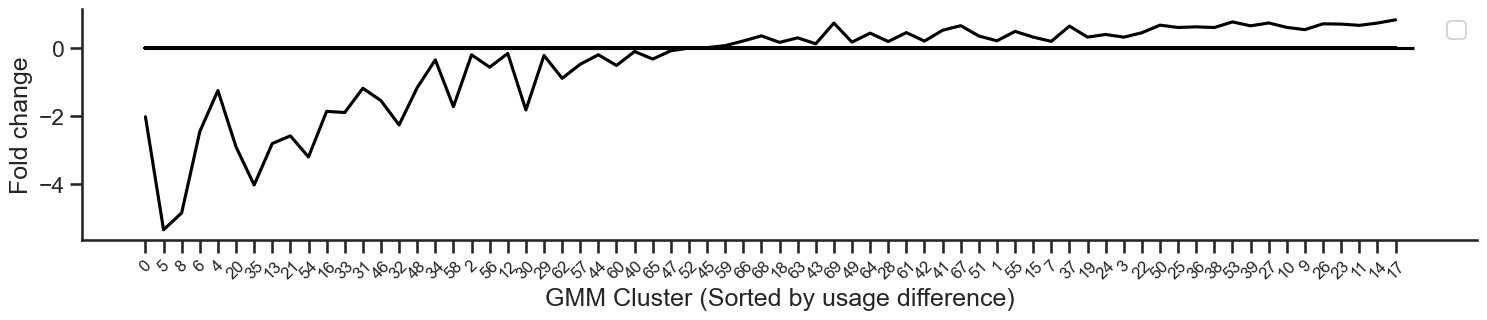

In [269]:
figure(figsize=(18,3))

plot((z_c2_prop[z2z4_diff]-z_c4_prop[z2z4_diff])/z_c2_prop[z2z4_diff], c='k')
# plot(z_c2_prop[z2z4_diff]/z_c4_prop[z2z4_diff], label='C2', c='C0')
# plot(z_c2_prop[z2z4_diff], label='C2', c='C0')
# plot(z_c4_prop[z2z4_diff], label='C4', c='C1')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z4_diff, rotation=45, fontsize=_fontsize)
# ylim(0,.075)
hlines(0,0,70, color='k')
ylabel('Fold change')
xlabel('GMM Cluster (Sorted by usage difference)')

[plot(c2c4_diff[i][z2z4_diff], 'k') for i in range(1000)];

sns.despine()

In [224]:
usages_perm = usages[perm]

In [228]:
c2_labels_perm = usages_perm[cohort_id == 'c2']
c4_labels_perm = usages_perm[cohort_id == 'c4']
c5_labels_perm = usages_perm[cohort_id == 'c5']

In [234]:
c2_usages = np.unique(c2_labels_perm, return_counts=True)[1]/len(c2_labels_perm)
c2_usages_reorder = c2_usages[reorder]

c4_usages = np.unique(c4_labels_perm, return_counts=True)[1]/len(c4_labels_perm)
c4_usages_reorder = c4_usages[reorder]

c5_usages = np.unique(c5_labels_perm, return_counts=True)[1]/len(c5_labels_perm)
c5_usages_reorder = c5_usages[reorder]

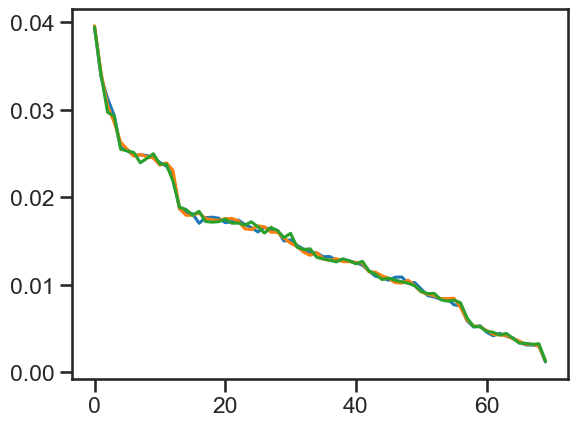

In [235]:
plot(c2_usages_reorder)
plot(c4_usages_reorder)
plot(c5_usages_reorder)

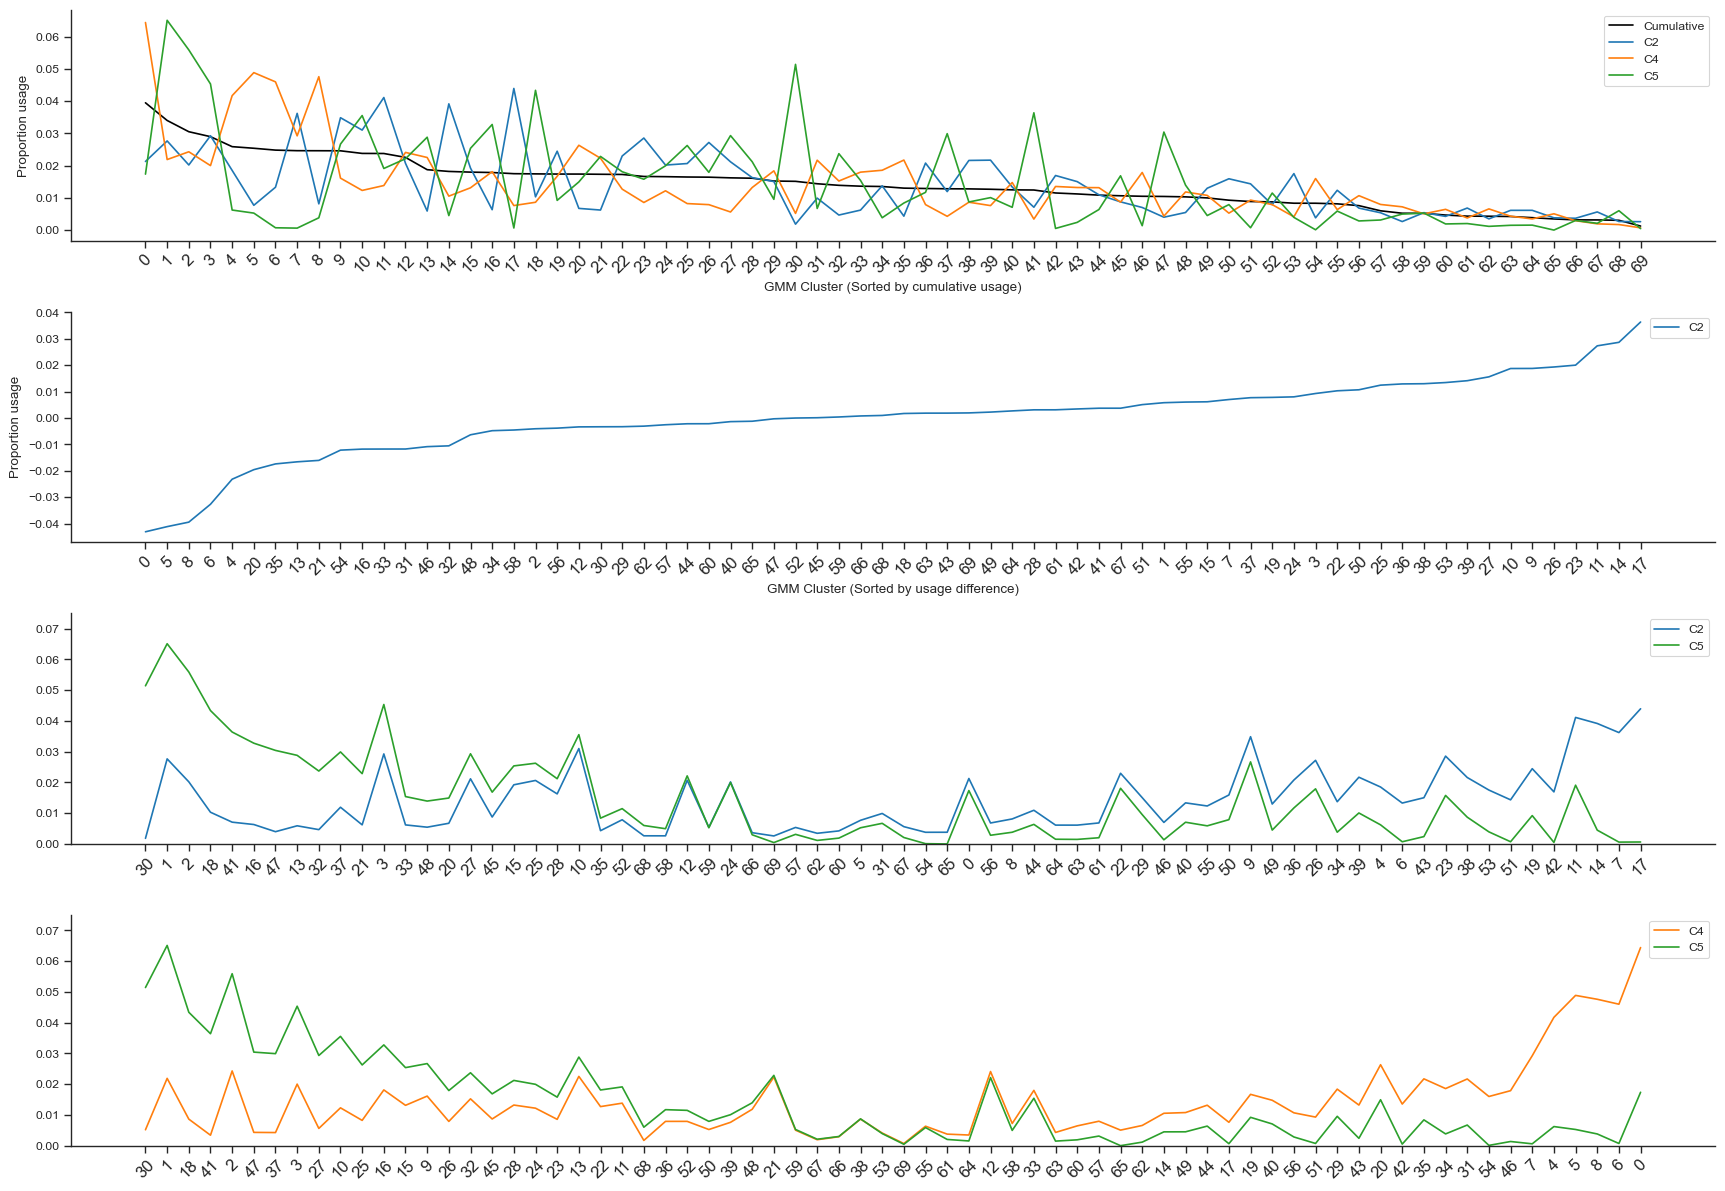

In [203]:
figure(figsize=(18,12))

_fontsize=12

subplot(4,1,1)
plot(z[reorder]/sum(z[reorder]), 'k', label='Cumulative')
plot(z_c2_prop, label='C2')
plot(z_c4_prop, label='C4')
plot(z_c5_prop, label='C5')

ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by cumulative usage)')
xticks(np.arange(70), fontsize=_fontsize, rotation=45)
legend(bbox_to_anchor=(1,1))
sns.despine()


subplot(4,1,2)
plot(z_c2_prop[z2z4_diff]-z_c4_prop[z2z4_diff], label='C2', c='C0')

# plot(z_c2_prop[z2z4_diff], label='C2', c='C0')
# plot(z_c4_prop[z2z4_diff], label='C4', c='C1')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z4_diff, rotation=45, fontsize=_fontsize)
# ylim(0,.075)
ylabel('Proportion usage')
xlabel('GMM Cluster (Sorted by usage difference)')

subplot(4,1,3)
plot(z_c2_prop[z2z5_diff], label='C2', c='C0')
plot(z_c5_prop[z2z5_diff], label='C5', c='C2')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z2z5_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)

subplot(4,1,4)
plot(z_c4_prop[z4z5_diff], label='C4', c='C1')
plot(z_c5_prop[z4z5_diff], label='C5', c='C2')
legend(bbox_to_anchor=(1,1))
xticks(np.arange(70), z4z5_diff, rotation=45, fontsize=_fontsize)
ylim(0,.075)

# ylabel('Proportion usage')
# xlabel('GMM Cluster (Sorted by usage difference)')

sns.despine()
tight_layout()
# savefig('/Users/ralph/Downloads/usages.svg')

In [134]:
n=5

c2_top = np.concatenate((z2z4_diff[-n:], z2z5_diff[-n:]))
c4_top = np.concatenate((z2z4_diff[:n], z4z5_diff[-n:]))
c5_top = np.concatenate((z2z5_diff[:n], z4z5_diff[:n]))

In [135]:
len(np.unique(c2_top)), len(np.unique(c4_top)), len(np.unique(c5_top))

(7, 5, 5)

In [136]:
np.unique(c2_top)

array([ 7, 11, 14, 17, 23, 26, 42])

In [137]:
np.unique(c4_top)

array([0, 4, 5, 6, 8])

In [138]:
np.unique(c5_top)

array([ 1,  2, 18, 30, 41])

In [25]:

# Get and print the column names
column_names = df.columns.tolist()
print(column_names)

# 

['index', 'timestamp', 'onset', 'offset', 'hour_of_day', 'date', 'spectral_flatness', 'latent_mean_umap', 'audio_filename', 'cohort', 'dt_start', 'cluster_hand', 'latent_means', 'watershed10', 'latent_mean_proj', 'cohort_int', 'z_50', 'z_60', 'z_70', 'prob_z_50', 'prob_z_60', 'prob_z_70']


In [26]:
unique_values = df['cohort'].unique()

print(unique_values)

['c2' 'c4' 'c5']


In [27]:
import pandas as pd

# Create a sample DataFrame
data = {'cohort': ['c1', 'c2', 'c1', 'c2', 'c3']}
df = pd.DataFrame(data)

# Filter rows where the "cohort" column has the value "c2"
filtered_df = df[df['cohort'] == 'c2']

print(filtered_df)


# Filter rows where the "cohort" column has the value "c2"
filtered_df = df[df['cohort'] == 'c2']

print(filtered_df)


  cohort
1     c2
3     c2


In [24]:
df


,index,timestamp,onset,offset,hour_of_day,date,spectral_flatness,latent_mean_umap,audio_filename,cohort,...,latent_means,watershed10,latent_mean_proj,cohort_int,z_50,z_60,z_70,prob_z_50,prob_z_60,prob_z_70
0,0,2020-07-19 16:33:02.714427,6.85670,6.91405,16,7_19,0.280732,"[3.75751, 10.7662]",2020_07_19_16_32_55_857727_merged.wav,c2,...,"[0.02995220385491848, -0.008062472566962242, 0...",9,"[-1.1179672479629517, -0.21071967482566833, 0....",0,47,53,8,"[1.9097156696414864e-10, 1.0351839586315275e-0...","[1.7959669284054926e-10, 2.7148095081482925e-0...","[1.8651037390239356e-07, 7.761379890649541e-15..."
1,1,2020-07-19 16:33:03.007297,7.14957,7.25402,16,7_19,0.270788,"[6.199217, 10.828015]",2020_07_19_16_32_55_857727_merged.wav,c2,...,"[0.0047006369568407536, -0.010631853714585304,...",10,"[-0.7435935735702515, -1.1395747661590576, -0....",0,5,38,38,"[6.319053531102752e-11, 7.908638711274694e-10,...","[6.963410674941814e-16, 2.668960786866249e-08,...","[3.6942279186285234e-06, 1.7388145159015927e-1..."
2,2,2020-07-19 16:33:08.129347,12.27162,12.30848,16,7_19,0.299881,"[3.1725628, 11.360638]",2020_07_19_16_32_55_857727_merged.wav,c2,...,"[0.014064190909266472, -0.013552043586969376, ...",9,"[-0.7571112513542175, -0.40558552742004395, 0....",0,47,53,8,"[2.904550899032307e-08, 2.955339157817723e-05,...","[2.296232930975471e-08, 8.034072726781135e-09,...","[8.461947225976999e-08, 2.7906613584682245e-12..."
3,3,2020-07-19 16:33:11.412287,15.55456,15.84128,16,7_19,0.248437,"[6.0806956, 10.417568]",2020_07_19_16_32_55_857727_merged.wav,c2,...,"[0.027012603357434273, -0.05530998110771179, 0...",10,"[-1.813117265701294, -2.306171417236328, -0.87...",0,27,43,51,"[1.0403468830125203e-18, 1.2077774814511768e-1...","[3.568418585221004e-36, 2.549523178528079e-06,...","[9.277949437334984e-07, 4.181230917694514e-33,..."
4,4,2020-07-19 16:33:11.803457,15.94573,16.03174,16,7_19,0.268872,"[5.574234, 11.243705]",2020_07_19_16_32_55_857727_merged.wav,c2,...,"[0.0017412048764526844, -0.007151264697313309,...",10,"[-0.3980937600135803, -0.014692068099975586, -...",0,5,38,33,"[1.7203201917848898e-09, 5.390720172025995e-09...","[6.184930994333925e-13, 1.2136848318344718e-08...","[6.161427029979422e-07, 6.315504998964605e-15,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583232,601482,2022-01-08 13:41:33.571078,2761.34912,2761.46995,13,1_8,0.297389,"[-3.318517, -0.6252182]",2022_01_08_12_55_32_221958_combined.wav,c5,...,"[0.011426115408539772, 0.021827582269906998, 0...",1,"[-0.22638572752475739, -0.20343220233917236, 0...",2,40,35,43,"[5.464606721884461e-12, 1.7958042064522131e-06...","[3.031609714959494e-10, 7.038467494540539e-05,...","[1.069833695355209e-07, 1.576202131446197e-07,..."
583233,601484,2022-01-08 13:41:41.906438,2769.68448,2769.97120,13,1_8,0.197119,"[-1.8817042, -0.9340269]",2022_01_08_12_55_32_221958_combined.wav,c5,...,"[0.11429768800735474, -0.0705215334892273, 0.1...",1,"[-3.6328186988830566, -1.4410263299942017, 3.1...",2,36,54,28,"[7.76811032309265e-40, 5.50396760056639e-23, 7...","[2.291323963776528e-64, 1.2901304293773832e-09...","[4.4161801009370216e-16, 5.6254414975867e-63, ..."
583234,601582,2022-01-08 13:54:15.830538,3523.60858,3523.67616,13,1_8,0.281301,"[-2.7643046, -1.8492085]",2022_01_08_12_55_32_221958_combined.wav,c5,...,"[0.010498063638806343, 0.02554859220981598, -0...",1,"[0.5405005216598511, 0.2650536298751831, 0.338...",2,12,27,46,"[1.8918633570302427e-09, 3.1975440296938494e-0...","[5.609713661311645e-08, 6.896726307130532e-05,...","[1.7946818474939857e-08, 4.4999213801587885e-0..."
583235,601585,2022-01-08 13:54:22.044168,3529.82221,3529.91437,13,1_8,0.299361,"[2.2762504, 2.6843903]",2022_01_08_12_55_32_221958_combined.wav,c5,...,"[0.005001299548894167, -0.0019889436662197113,...",7,"[0.10759465396404266, 0.8357921838760376, 0.24...",2,13,9,21,"[4.8040509705692105e-06, 0.004867320142500831,...","[0.18582198963882077, 0.006146300422342767, 0....","[0.0008310248919499727,

# umap cluster viz

In [21]:
latent_mean_umap = np.vstack(df.latent_mean_umap.values)

(-8.564327430725097, 15.928724479675292, -3.194804859161377, 16.16500253677368)

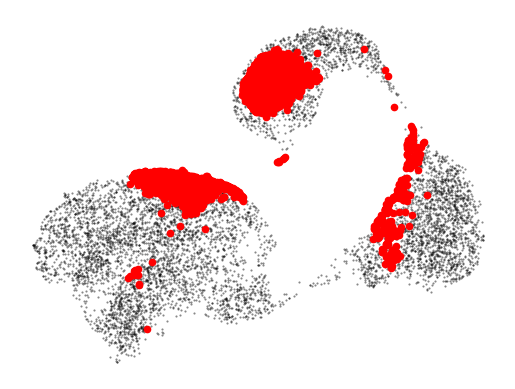

In [22]:
i = 11
idx = np.where(reorder == i)[0][0]
working_umap = np.vstack(df[df.z_70 == idx].latent_mean_umap)

plot(latent_mean_umap[::75, 0], latent_mean_umap[::75, 1], '.k', alpha=0.5, markersize=1)
plot(working_umap[:,0], working_umap[:,1], '.r')
axis('off')

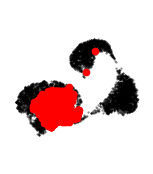

In [23]:
figure(figsize=(10,2))
# states = [0, 5, 8, 6, 4]
# states = [1, 14]
states = [8]
for i in range(len(states)):
    
    idx = np.where(reorder == i)[0][0]
    working_umap = np.vstack(df[df.z_70 == idx].latent_mean_umap)
    
    subplot(1,5,i+1)
    plot(latent_mean_umap[::75, 0], latent_mean_umap[::75, 1], '.k', alpha=0.5, markersize=1)
    plot(working_umap[:,0], working_umap[:,1], '.r')
    axis('off')
    axis('equal')

In [281]:
df_sub_c2 = df_c2[df_c2.z_70 == i]
df_sub_c4 = df_c4[df_c4.z_70 == i]
df_sub_c5 = df_c5[df_c5.z_70 == i]

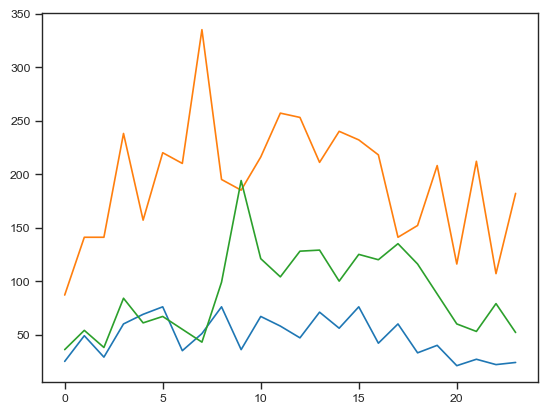

In [286]:
plot(df_sub_c2.groupby('hour_of_day')['index'].count().values)
plot(df_sub_c4.groupby('hour_of_day')['index'].count().values)
plot(df_sub_c5.groupby('hour_of_day')['index'].count().values)

In [ ]:
plot(df_sub_c2.groupby('hour_of_day')['index'].count().values)
plot(df_sub_c4.groupby('hour_of_day')['index'].count().values)
plot(df_sub_c5.groupby('hour_of_day')['index'].count().values)

In [294]:
df_sub_c2.groupby('date')['index'].count()

date
7_19      6
7_20    179
7_21     72
7_22     46
7_23     66
7_24     78
7_25     81
7_26     81
7_27    104
7_28     54
7_29     25
7_30    104
7_31     75
8_1      95
8_2      36
8_3      41
8_4       6
8_6       1
Name: index, dtype: int64

In [299]:
df_sub_c4.groupby('date')['index'].count()

date
10_1    282
10_2    193
10_3     14
10_4      8
10_5      7
10_6     27
10_7     13
10_8      6
10_9     50
9_19      7
9_20    813
9_21    605
9_22    481
9_23    570
9_24    206
9_25     42
9_26    153
9_27    258
9_28    387
9_29    292
9_30    240
Name: index, dtype: int64

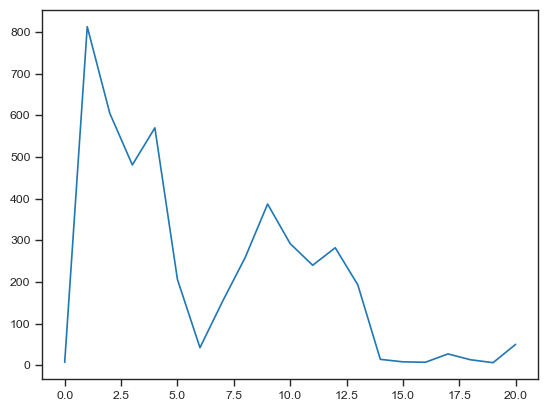

In [301]:
plot(np.concatenate((df_sub_c4.groupby('date')['index'].count().values[9:], 
               df_sub_c4.groupby('date')['index'].count().values[:9])))

# 3d plot 

In [143]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation

In [144]:
_colors = np.array([np.argsort(z_all_prop[:,i])[::-1][0] for i in range(70)])
colors = np.array(['C0', 'C1', 'C2'])[_colors]

In [182]:
sns.set_context('paper')

/var/folders/q6/gx8jrp3x6dg0y2lsg51ny8q40000gn/T/ipykernel_93002/1901533552.py:27: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


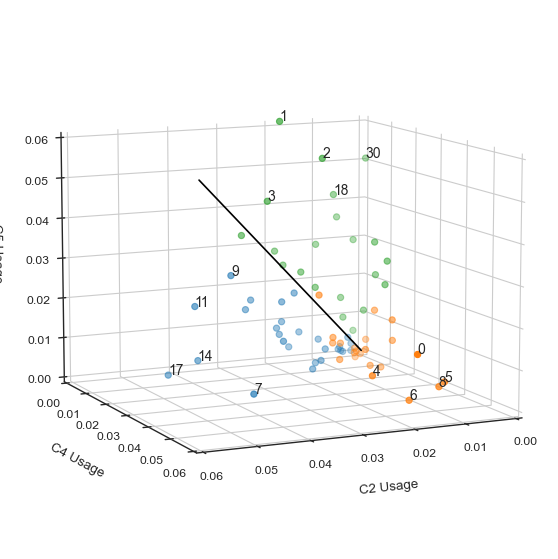

In [200]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
s = ax.scatter(z_c2_prop, 
               z_c4_prop, 
               z_c5_prop, 
               c=colors,
               depthshade=True);

# [ax.text(z_c2_prop[i],
#          z_c4_prop[i],
#          z_c5_prop[i],
#          str(i), fontsize=8) for i in range(70)]

[ax.text(z_c2_prop[i],
         z_c4_prop[i],
         z_c5_prop[i],
         str(i), fontsize=10) for i in states]

ax.set_xlabel('C2 Usage', labelpad=10)
ax.set_ylabel('C4 Usage', labelpad=10)
ax.set_zlabel('C5 Usage', labelpad=10)

ax.set_xlim(0, .06)
ax.set_ylim(0, .06)
ax.set_zlim(0, .06)

ax.dist = 12

# Get rid of the panes
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.plot([0,0.06],
        [0,0.06],
        [0,0.06], c='k')

# ax.grid(False)
# ax.view_init(elev=20., azim=0)
ax.view_init(elev=10., azim=65)
# ax.view_init(elev=20., azim=60)

# savefig('usages_3d_azim90.svg')

In [201]:
g = [1, 2, 3, 30, 18]
b = [17, 11, 14, 7, 9]
o = [0, 4, 6, 8, 5]

states = g + b + o

In [156]:
def init():
    ax.view_init(elev=10., azim=0)
    return s,


def animate(i):
    ax.view_init(elev=20., azim=i)
    return s,


# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('usages_3d_text.mp4', fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)

In [15]:
def lineseg_dist(p, a, b):

    # normalized tangent vector
    d = np.divide(b - a, np.linalg.norm(b - a))

    # signed parallel distance components
    s = np.dot(a - p, d)
    t = np.dot(p - b, d)

    # clamped parallel distance
    h = np.maximum.reduce([s, t, 0])

    # perpendicular distance component
    c = np.cross(p - a, d)

    return np.hypot(h, np.linalg.norm(c))

In [107]:
d = np.array([lineseg_dist(z_all_prop[:,i], 
             np.array([0,0,0]), 
             np.array([0.06, 0.06, 0.06])) for i in range(70)])

In [108]:
np.argsort(d)[::-1]

array([30,  0,  5,  8,  1,  6, 17, 18,  2,  7, 14, 41,  4, 47, 11, 16, 37,
        3, 10, 27, 13, 23, 20, 26, 32, 21,  9, 25, 35, 42, 46, 54, 31, 53,
       19, 39, 34, 38, 51, 43, 36, 33, 15, 50, 22, 45, 24, 29, 48, 49, 40,
       28, 56, 55, 44, 62, 65, 61, 57, 63, 64, 58, 60, 68, 67, 52, 12, 69,
       66, 59])

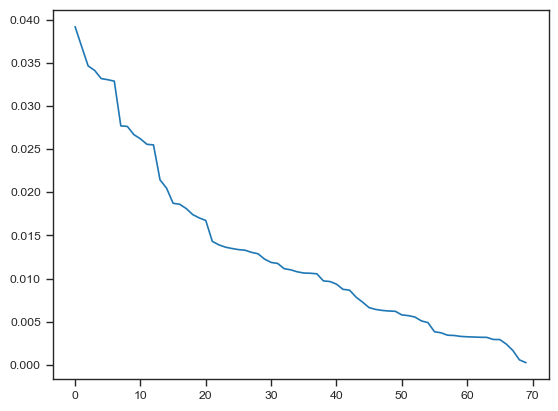

In [17]:
plot(d[np.argsort(d)[::-1]])

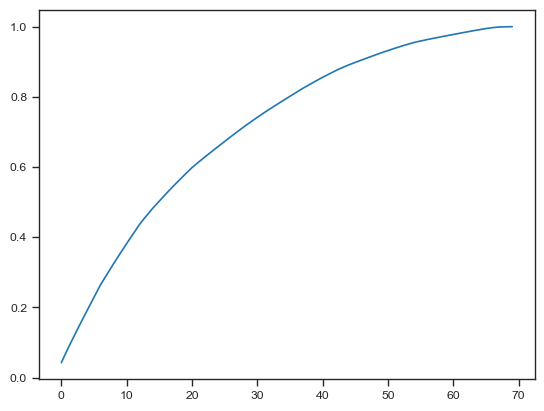

In [19]:
plot(np.cumsum(d[np.argsort(d)[::-1]]/sum(d[np.argsort(d)[::-1]])))

# when are states used 

# rename states by usage 

In [81]:
basename = '/Users/ralph/Downloads/k70_gmm_n100_topProb/'

In [ ]:
for i in range(70):
    working_fn = os.path.join(basename, 'state')

In [22]:
from glob import glob

In [40]:
import shutil as sh

In [71]:
fns = np.sort(glob('/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label/*'))


In [80]:
fns = np.sort(glob('/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label/*'))
for i in range(70):
    working_fn = fns[i]
#     outfile = working_fn[:-13] + '.png'
    outfile = fns[i].replace('_' + fns[i].split('_')[-1], '.png')
    sh.move(working_fn, outfile)

In [70]:
reorder

array([67,  6,  3, 47,  9, 69, 55, 17, 34, 58, 53, 23, 10, 46, 32, 35, 39,
       60, 15, 37, 12, 43, 50,  1, 63, 65,  5, 22, 54, 40,  8, 21, 45, 36,
       66, 49,  7, 14, 59, 11, 33, 16, 52, 41,  4, 13, 20, 29, 25, 38, 27,
       64, 26, 62, 19, 31, 42, 48, 44, 56,  2,  0, 51, 57, 18, 68, 28, 61,
       30, 24])

In [81]:
fns = np.sort(glob('/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label/*'))

In [83]:
fns.shape

(70,)

In [96]:
working_fn = fns[2]
working_fn

'/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label/state_10.png'

In [97]:
working_fn.replace('state_{}.png'.format(i), 'state_{}.png'.format(reorder[i]))

'/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label/state_10.png'

In [ ]:
working_fn.replace()

In [98]:
i=2
basename = '/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label'
working_fn = os.path.join(basename, 'state_{}.png'.format(i))

In [99]:
working_fn

'/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label/state_2.png'

In [101]:
for i in range(70):
    basename = '/Users/ralph/Downloads/k70_gmm_n100_topProb/original_label'
    working_fn = os.path.join(basename, 'state_{}.png'.format(i))
    
    _outfile = working_fn.replace('state_{}.png'.format(i), 'state_{}.png'.format(reorder[i]))
    outfile = os.path.join('/Users/ralph/Downloads/k70_gmm_n100_topProb/reorder_label/', 
                           os.path.basename(_outfile))
#     print(i)
#     print(working_fn)
#     print(_outfile)
#     print(outfile)
#     print()
    sh.copy(working_fn, outfile)

In [139]:
reorder[1]

6

In [140]:
df_sub_state = df_c2[df_c2.z_70 == reorder[1]]

In [141]:
len(df_sub_state)

5128

In [136]:
df_sub_state

0         False
1         False
2         False
3         False
4         False
          ...  
185409    False
185410    False
185411    False
185412    False
185413    False
Name: z_70, Length: 185414, dtype: bool